In [30]:
from sklearnex import patch_sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as rdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
data = pd.read_csv('train.csv') # Carico i dati
data.head() # Stampo le prime 5 righe

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [31]:
data.shape # Stampo il numero di righe e colonne

(103904, 25)

In [32]:
data.info() # stampo il tipo di ogni colonna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [79]:
# Stampo percentuali per Genere e soddisfazione  .
n_data = data.groupby(['Gender', 'satisfaction'], as_index=False).id.count() # uso groupby per aggregare dati
n_data.columns = ['Gender', 'satisfaction','percentage']
n_data.percentage/=data.shape[0]/100  # converto le frazioni in percentuale sul totale
n_data


,Gender,satisfaction,percentage
0,Female,neutral or dissatisfied,29.058554
1,Female,satisfied,21.687327
2,Male,neutral or dissatisfied,27.608177
3,Male,satisfied,21.645942


In [82]:
# Stampo percentuali per Classe e soddisfazione.
n_data = data.groupby(['Class', 'satisfaction'], as_index=False).id.count()
n_data.columns = ['Class', 'satisfaction','percentage']
n_data.percentage/=data.shape[0]/100 
n_data


,Class,satisfaction,percentage
0,Business,neutral or dissatisfied,14.614452
1,Business,satisfied,33.184478
2,Eco,neutral or dissatisfied,36.614567
3,Eco,satisfied,8.374076
4,Eco Plus,neutral or dissatisfied,5.437712
5,Eco Plus,satisfied,1.774715


In [97]:
# Stampo percentuali per Tipo Cliente e soddisfazione  .
n_data = data.groupby(['Customer Type', 'satisfaction'], as_index=False).id.count()
n_data.columns = ['Customer Type', 'satisfaction','percentage']
n_data.percentage/=data.shape[0]/100 
n_data


,Customer Type,satisfaction,percentage
0,Loyal Customer,neutral or dissatisfied,42.722128
1,Loyal Customer,satisfied,39.010048
2,disloyal Customer,neutral or dissatisfied,13.944603
3,disloyal Customer,satisfied,4.323221


In [106]:
# Stampo percentuali per età suddivise in 5 scaglioni da 20 anni e soddisfazione.
bata = data.copy(deep=True)
bata.Age = bata.Age//20 # la doppia slash restituisce la parte intera (da 0 a 4) della divisione
n_data = bata.groupby(['Age', 'satisfaction'], as_index=False).id.count()

n_data.columns = ['Age', 'satisfaction','percentage']
n_data.Age = n_data.Age*20 # riporto le età in scaglioni di 20
n_data.percentage/=data.shape[0]/100 
n_data

,Age,satisfaction,percentage
0,0,neutral or dissatisfied,7.749461
1,0,satisfied,1.694834
2,20,neutral or dissatisfied,24.676625
3,20,satisfied,15.334347
4,40,neutral or dissatisfied,17.423776
5,40,satisfied,23.767131
6,60,neutral or dissatisfied,6.742763
7,60,satisfied,2.519634
8,80,neutral or dissatisfied,0.074107
9,80,satisfied,0.017324


In [112]:
# Stampo percentuali per miglia suddivise in 4 scaglioni da 1000 miglia e soddisfazione.
bata = data.copy(deep=True)
bata['Flight Distance'] = bata['Flight Distance']//1000
n_data = bata.groupby(['Flight Distance', 'satisfaction'], as_index=False).id.count()

n_data.columns = ['Flight Distance', 'satisfaction','percentage']
n_data['Flight Distance'] = n_data['Flight Distance']*1000
n_data.percentage/=data.shape[0]/100 
n_data

,Flight Distance,satisfaction,percentage
0,0,neutral or dissatisfied,38.751155
1,0,satisfied,19.046427
2,1000,neutral or dissatisfied,11.651140
3,1000,satisfied,9.930320
4,2000,neutral or dissatisfied,4.466623
5,2000,satisfied,8.192177
6,3000,neutral or dissatisfied,1.771828
7,3000,satisfied,6.123922
8,4000,neutral or dissatisfied,0.025986
9,4000,satisfied,0.040422


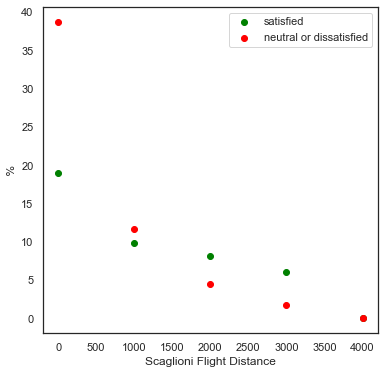

In [194]:
# Scatterplot della tabella precedente
# ogni punto rappresenta un valore percentuale : rosso = neutrale o insoddisfatto e verde = soddisfatto.

categorical_1 = ['satisfied','neutral or dissatisfied']
colors        = ['green', 'red']


number_groups = len(categorical_1) 
bin_width = 1.0/(number_groups+1) #larghezza contenitore
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('Scaglioni Flight Distance')
ax.set_ylabel(' % ')

for i in range(number_groups):                        #viene filtrato n_data (vedi cella precedente)
    mask = n_data.satisfaction == categorical_1[i] # seleziona tutti seddisfatti / non soddisfatti in base al valore di i
    df = n_data[mask]  # filtra in base al criterio di selezione
    for j,(_id, riga) in enumerate(df.iterrows()): #itera sulle righe filtrate
        ax.scatter([riga['Flight Distance']], [riga.percentage], color=colors[i] ) # plotta un punto di Flight Distance vs %
        
for i in range(number_groups):
    ax.scatter([np.nan], [np.nan], color=colors[i], label =  categorical_1[i]) #plotta punti per la label
ax.legend()

In [114]:
n_data['Flight Distance'].unique() # per controllare quanti scaglioni ci sono

array([   0, 1000, 2000, 3000, 4000], dtype=int64)

In [151]:
data.isna().sum() # cerco se ci sono dei nan

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [152]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True) 
# sostituisco nan con 0 

In [153]:
data.isna().sum() # controllo che il procedimento sia andato a buonfine

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [179]:
#Poiché Random Forest prende in input solo numeri per tutte le colonne Object ho assegnato un valore.

bata = data.copy(deep=True) #creo una copia del dataset iniziale

genderk = np.zeros(len(data)) #genero un vettore di lunghezza concorde al dataset e riempito di zeri
for z in range(len(data)):
    genderk[z] = 0 if bata.Gender[z] == 'Male' else 1 
bata['genderk'] = genderk # aggiungo la colonna creata con i numeri
bata = bata.drop('Gender', axis=1) # elimino la colonna object

customerk = np.zeros(len(data))
for z in range(len(data)):
    customerk[z] = 0 if bata['Customer Type'][z] == 'Loyal Customer' else 1
bata['customerk'] = customerk
bata = bata.drop('Customer Type', axis=1)

travelk = np.zeros(len(data))
for z in range(len(data)):
    travelk[z] = 0 if bata['Type of Travel'][z] == 'Personal Travel' else 1
bata['travelk'] = travelk
bata = bata.drop('Type of Travel', axis=1)


classk = np.zeros(len(data))
for z in range(len(data)):
    if bata.Class[z] == 'Business' :
        classk[z] = 0 
    if bata.Class[z] == 'Eco' :
        classk[z] = 1
    if bata.Class[z] == 'Eco Plus' :
        classk[z] = 2
        
bata['classk'] = classk
bata = bata.drop('Class', axis=1)




bata # controllato di aver aggiunto le nuove colonne ed eliminato le vecchie

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,genderk,customerk,travelk,classk
0,0,70172,13,460,3,4,3,1,5,3,...,4,5,5,25,18.0,neutral or dissatisfied,0.0,0.0,0.0,2.0
1,1,5047,25,235,3,2,3,3,1,3,...,1,4,1,1,6.0,neutral or dissatisfied,0.0,1.0,1.0,0.0
2,2,110028,26,1142,2,2,2,2,5,5,...,4,4,5,0,0.0,satisfied,1.0,0.0,1.0,0.0
3,3,24026,25,562,2,5,5,5,2,2,...,1,4,2,11,9.0,neutral or dissatisfied,1.0,0.0,1.0,0.0
4,4,119299,61,214,3,3,3,3,4,5,...,3,3,3,0,0.0,satisfied,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,...,2,3,2,3,0.0,neutral or dissatisfied,1.0,1.0,1.0,1.0
103900,103900,73097,49,2347,4,4,4,4,2,4,...,5,5,4,0,0.0,satisfied,0.0,0.0,1.0,0.0
103901,103901,68825,30,1995,1,1,1,3,4,1,...,5,5,4,7,14.0,neutral or dissatisfied,0.0,1.0,1.0,0.0
103902,103902,54173,22,1000,1,1,1,5,1,1,...,5,4,1,0,0.0,neutral or dissatisfied,1.0,1.0,1.0,1.0


In [184]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = bata.drop(['satisfaction'], axis=1) #colonnne features tutto meno satisfaction 


target = bata['satisfaction'] # seleziono satisfaction
# utilizzo il 20% da train.csv come test

#faccio lo split in 20% per il test e 80% per il train, lo split è casuale
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) 

rf_classifier = RandomForestClassifier()  # inizializzazione

rf_classifier.fit(X_train, y_train) # avviene il train ovvvero sull'80%

predictions = rf_classifier.predict(X_test) # test sul 20%


accuracy = accuracy_score(y_test, predictions) # l'accuratezza è al 96%
print("Accuratezza del modello:", accuracy)


Accuratezza del modello: 0.960300274289014


Text(0, 0.5, 'Mean decrease in impurity')

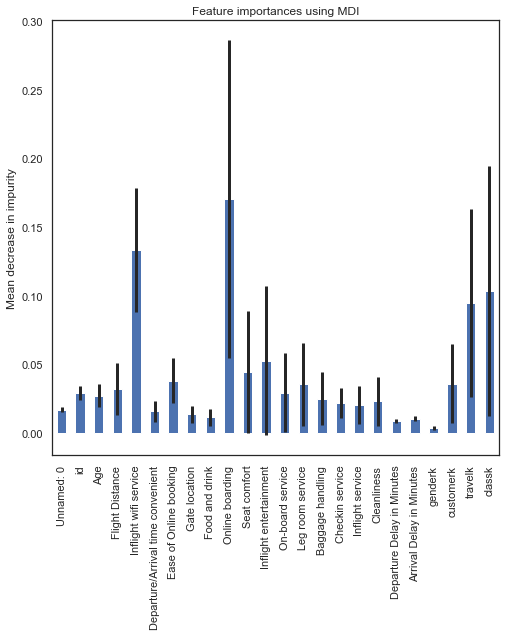

In [199]:
importances = rf_classifier.feature_importances_ # Calcola le importanze delle feature utilizzando l'attributo feature_importances_ 
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0) #calcola la deviazione standard
forest_importances = pd.Series(importances, index = list(features.columns)) # Crea una serie Pandas che associa le importanze delle feature
#ai nomi delle colonne corrispondenti nel DataFrame "features".

fig, ax = plt.subplots(figsize=(8,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


